Once you have created a set of potential predictors for taxi demand, it’s important to evaluate their effectiveness. 

As more features mean more complicated models, extraneous features can make it harder to diagnose and fix other issues when training and validating your model. They also make it harder to understand the effects of other predictors, and how your model uses them to make its predictions.  

In Data Processing and Feature Engineering, you were shown how to evaluate features using statistical ‘filter’ methods and eliminate features that aren’t likely to help your model. You also learned how to identify potential relationships between features using different types of visualizations.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from datetime import datetime, timedelta
import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("finaltrain.csv")

In [3]:
df

,passenger_count,trip_distance,pickup_location,fare_amount,extra,tip_amount,total_amount,duration,pickupday,demand
0,2,12.74,JFK Airport,47.5,0.5,9.60,58.40,24.0,29,low
1,1,17.50,JFK Airport,52.0,0.0,7.00,65.13,32.0,1,low
2,2,18.50,JFK Airport,51.0,0.5,0.00,57.63,30.0,18,low
3,1,14.80,JFK Airport,41.0,0.0,0.00,41.80,29.0,13,low
4,1,14.30,JFK Airport,39.5,0.5,0.00,40.80,22.0,29,low
...,...,...,...,...,...,...,...,...,...,...
68563,1,1.69,Upper East Side,8.0,0.0,0.00,8.80,8.0,10,low
68564,1,1.80,Upper East Side,12.5,0.0,2.00,15.30,18.0,3,low
68565,5,1.54,Upper East Side,7.5,1.0,1.70,11.00,7.0,15,high
68566,1,0.78,Upper East Side,5.5,1.0,1.25,8.55,5.0,15,low


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68568 entries, 0 to 68567
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  68568 non-null  int64  
 1   trip_distance    68568 non-null  float64
 2   pickup_location  68568 non-null  object 
 3   fare_amount      68568 non-null  float64
 4   extra            68568 non-null  float64
 5   tip_amount       68568 non-null  float64
 6   total_amount     68568 non-null  float64
 7   duration         68568 non-null  float64
 8   pickupday        68568 non-null  int64  
 9   demand           68568 non-null  object 
dtypes: float64(6), int64(2), object(2)
memory usage: 5.2+ MB


In [5]:
df.describe()

,passenger_count,trip_distance,fare_amount,extra,tip_amount,total_amount,duration,pickupday
count,68568.000000,6.856800e+04,68568.000000,68568.000000,68568.000000,68568.000000,68568.000000,68568.000000
mean,1.690424,5.194054e+01,13.839213,0.285746,1.760108,17.174227,14.549921,15.838000
std,1.346843,1.267113e+04,13.059612,0.365959,2.775889,16.001486,36.983077,8.716985
min,0.000000,0.000000e+00,-52.000000,-1.000000,0.000000,-52.800000,0.000000,1.000000
25%,1.000000,1.000000e+00,6.500000,0.000000,0.000000,8.160000,6.000000,8.000000
50%,1.000000,1.700000e+00,9.000000,0.000000,1.000000,11.300000,10.000000,15.000000
75%,2.000000,3.400000e+00,14.500000,0.500000,2.160000,17.800000,17.000000,23.000000
max,6.000000,3.318000e+06,570.080000,1.000000,94.510000,590.380000,1440.000000,31.000000


In [6]:
df.columns

Index(['passenger_count', 'trip_distance', 'pickup_location', 'fare_amount', 'extra', 'tip_amount', 'total_amount', 'duration', 'pickupday', 'demand'], dtype='object')

### Feature Engineering

In [7]:
df["isholiday"] = (df["pickupday"] == 1) | (df["pickupday"] == 19)

In [8]:
df

,passenger_count,trip_distance,pickup_location,fare_amount,extra,tip_amount,total_amount,duration,pickupday,demand,isholiday
0,2,12.74,JFK Airport,47.5,0.5,9.60,58.40,24.0,29,low,False
1,1,17.50,JFK Airport,52.0,0.0,7.00,65.13,32.0,1,low,True
2,2,18.50,JFK Airport,51.0,0.5,0.00,57.63,30.0,18,low,False
3,1,14.80,JFK Airport,41.0,0.0,0.00,41.80,29.0,13,low,False
4,1,14.30,JFK Airport,39.5,0.5,0.00,40.80,22.0,29,low,False
...,...,...,...,...,...,...,...,...,...,...,...
68563,1,1.69,Upper East Side,8.0,0.0,0.00,8.80,8.0,10,low,False
68564,1,1.80,Upper East Side,12.5,0.0,2.00,15.30,18.0,3,low,False
68565,5,1.54,Upper East Side,7.5,1.0,1.70,11.00,7.0,15,high,False
68566,1,0.78,Upper East Side,5.5,1.0,1.25,8.55,5.0,15,low,False


In [9]:
df["isholiday"].value_counts()

False    64581
True      3987
Name: isholiday, dtype: int64

In [10]:
df["isholiday"] = df["isholiday"].astype("int")

In [11]:
df

,passenger_count,trip_distance,pickup_location,fare_amount,extra,tip_amount,total_amount,duration,pickupday,demand,isholiday
0,2,12.74,JFK Airport,47.5,0.5,9.60,58.40,24.0,29,low,0
1,1,17.50,JFK Airport,52.0,0.0,7.00,65.13,32.0,1,low,1
2,2,18.50,JFK Airport,51.0,0.5,0.00,57.63,30.0,18,low,0
3,1,14.80,JFK Airport,41.0,0.0,0.00,41.80,29.0,13,low,0
4,1,14.30,JFK Airport,39.5,0.5,0.00,40.80,22.0,29,low,0
...,...,...,...,...,...,...,...,...,...,...,...
68563,1,1.69,Upper East Side,8.0,0.0,0.00,8.80,8.0,10,low,0
68564,1,1.80,Upper East Side,12.5,0.0,2.00,15.30,18.0,3,low,0
68565,5,1.54,Upper East Side,7.5,1.0,1.70,11.00,7.0,15,high,0
68566,1,0.78,Upper East Side,5.5,1.0,1.25,8.55,5.0,15,low,0


In [12]:
df["isholiday"].value_counts()

0    64581
1     3987
Name: isholiday, dtype: int64

In [13]:
df[df["isholiday"] == 1]

,passenger_count,trip_distance,pickup_location,fare_amount,extra,tip_amount,total_amount,duration,pickupday,demand,isholiday
1,1,17.50,JFK Airport,52.0,0.0,7.00,65.13,32.0,1,low,1
27,1,19.90,JFK Airport,55.5,0.0,16.85,73.15,34.0,19,low,1
36,1,2.47,JFK Airport,10.0,0.0,0.00,10.80,8.0,19,low,1
54,5,20.99,JFK Airport,56.0,0.5,12.37,75.00,31.0,1,high,1
56,2,18.80,JFK Airport,51.7,0.0,14.45,72.28,31.0,1,low,1
...,...,...,...,...,...,...,...,...,...,...,...
68488,1,9.68,Upper East Side,29.5,0.5,0.00,36.13,24.0,19,low,1
68523,1,1.07,Upper East Side,6.0,0.5,1.30,8.60,6.0,19,low,1
68536,1,9.60,Upper East Side,28.0,0.5,6.90,41.53,22.0,19,low,1
68543,1,8.54,Upper East Side,25.5,0.5,7.83,39.96,20.0,19,low,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68568 entries, 0 to 68567
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  68568 non-null  int64  
 1   trip_distance    68568 non-null  float64
 2   pickup_location  68568 non-null  object 
 3   fare_amount      68568 non-null  float64
 4   extra            68568 non-null  float64
 5   tip_amount       68568 non-null  float64
 6   total_amount     68568 non-null  float64
 7   duration         68568 non-null  float64
 8   pickupday        68568 non-null  int64  
 9   demand           68568 non-null  object 
 10  isholiday        68568 non-null  int32  
dtypes: float64(6), int32(1), int64(2), object(2)
memory usage: 5.5+ MB


In [15]:
le = LabelEncoder()

In [16]:
df["label"] = le.fit_transform(df["demand"])

In [17]:
df

,passenger_count,trip_distance,pickup_location,fare_amount,extra,tip_amount,total_amount,duration,pickupday,demand,isholiday,label
0,2,12.74,JFK Airport,47.5,0.5,9.60,58.40,24.0,29,low,0,1
1,1,17.50,JFK Airport,52.0,0.0,7.00,65.13,32.0,1,low,1,1
2,2,18.50,JFK Airport,51.0,0.5,0.00,57.63,30.0,18,low,0,1
3,1,14.80,JFK Airport,41.0,0.0,0.00,41.80,29.0,13,low,0,1
4,1,14.30,JFK Airport,39.5,0.5,0.00,40.80,22.0,29,low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68563,1,1.69,Upper East Side,8.0,0.0,0.00,8.80,8.0,10,low,0,1
68564,1,1.80,Upper East Side,12.5,0.0,2.00,15.30,18.0,3,low,0,1
68565,5,1.54,Upper East Side,7.5,1.0,1.70,11.00,7.0,15,high,0,0
68566,1,0.78,Upper East Side,5.5,1.0,1.25,8.55,5.0,15,low,0,1


In [18]:
df["label"].value_counts()

1    58036
0     6309
2     4223
Name: label, dtype: int64

In [19]:
df["pickupday"] = df["pickupday"].astype("category")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68568 entries, 0 to 68567
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   passenger_count  68568 non-null  int64   
 1   trip_distance    68568 non-null  float64 
 2   pickup_location  68568 non-null  object  
 3   fare_amount      68568 non-null  float64 
 4   extra            68568 non-null  float64 
 5   tip_amount       68568 non-null  float64 
 6   total_amount     68568 non-null  float64 
 7   duration         68568 non-null  float64 
 8   pickupday        68568 non-null  category
 9   demand           68568 non-null  object  
 10  isholiday        68568 non-null  int32   
 11  label            68568 non-null  int32   
dtypes: category(1), float64(6), int32(2), int64(1), object(2)
memory usage: 5.3+ MB


In [21]:
df.corr()

,passenger_count,trip_distance,fare_amount,extra,tip_amount,total_amount,duration,isholiday,label
passenger_count,1.000000,-0.001952,0.013251,-0.004897,-0.009516,0.010623,0.015734,0.009499,-0.456148
trip_distance,-0.001952,1.000000,0.000253,-0.003012,0.002720,0.000517,0.000451,-0.000938,0.000297
fare_amount,0.013251,0.000253,1.000000,-0.091227,0.604967,0.985443,0.261480,0.018778,0.002311
extra,-0.004897,-0.003012,-0.091227,1.000000,-0.034286,-0.066663,-0.026354,-0.069695,0.008931
tip_amount,-0.009516,0.002720,0.604967,-0.034286,1.000000,0.715987,0.149022,-0.000159,-0.005853
total_amount,0.010623,0.000517,0.985443,-0.066663,0.715987,1.000000,0.255307,0.014982,0.000621
duration,0.015734,0.000451,0.261480,-0.026354,0.149022,0.255307,1.000000,0.004844,-0.000696
isholiday,0.009499,-0.000938,0.018778,-0.069695,-0.000159,0.014982,0.004844,1.000000,0.007224
label,-0.456148,0.000297,0.002311,0.008931,-0.005853,0.000621,-0.000696,0.007224,1.000000


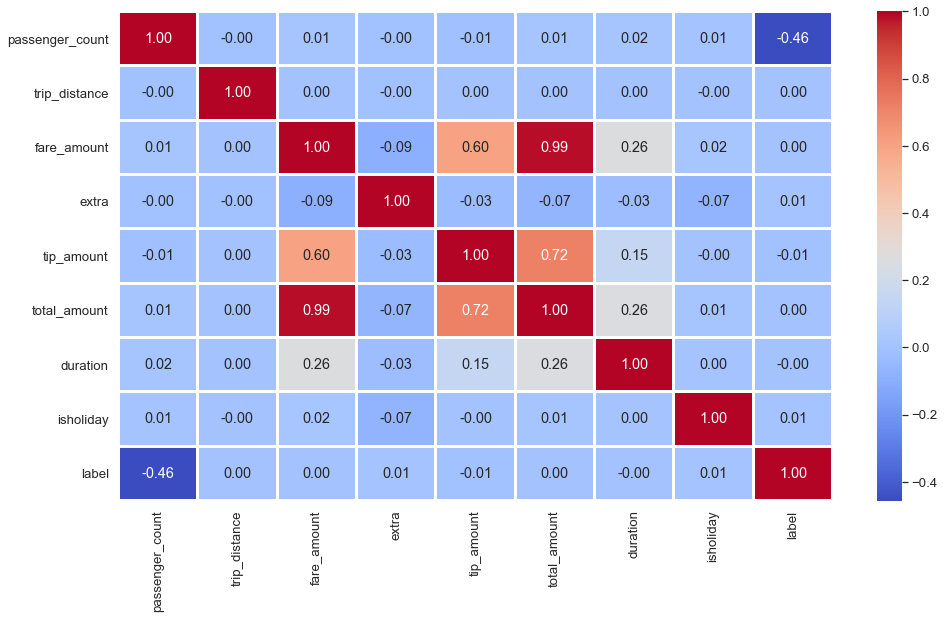

In [22]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

## Hypothesis Testing

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

### T-Test

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between male and females")
-   $H_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between male and females")


### T-Test

In [21]:
a = df["label"]
b = df["pickupday"]

In [22]:
scipy.stats.ttest_ind(a,b, equal_var = True)

Ttest_indResult(statistic=-446.193723987304, pvalue=0.0)

### ANOVA

First, we group the data into categories as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

-   40 years and younger
-   between 40 and 57 years
-   57 years and older


State the hypothesis: Treating day of the year as a numeric (double) variable, use the ANOVA1 function to obtain the p-value of a 1-way ANOVA test with Demand.

-   $H_0:$ 
-   $H_1:$ 


In [23]:
df["pickupday"] = df["pickupday"].astype("int")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68568 entries, 0 to 68567
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  68568 non-null  int64  
 1   trip_distance    68568 non-null  float64
 2   pickup_location  68568 non-null  object 
 3   fare_amount      68568 non-null  float64
 4   extra            68568 non-null  float64
 5   tip_amount       68568 non-null  float64
 6   total_amount     68568 non-null  float64
 7   duration         68568 non-null  float64
 8   pickupday        68568 non-null  int32  
 9   demand           68568 non-null  object 
 10  isholiday        68568 non-null  int32  
 11  label            68568 non-null  int32  
dtypes: float64(6), int32(3), int64(1), object(2)
memory usage: 5.5+ MB


In [25]:
f_statistic, p_value = scipy.stats.f_oneway(df.label, df.pickupday)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 199088.8393256583, P-Value: 0.0


### Chi-square

State the hypothesis: Evaluate the relationship between Demand and the day of the year using a chi-squared test, treating the day of the year as a categorical variable.
-   $H_0:$ 
-   $H_1:$ 

In [26]:
#Create a Cross-tab table

cont_table  = pd.crosstab(df["demand"], df["pickupday"])
cont_table

pickupday,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
demand,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high,180,174,200,159,211,208,213,222,243,221,200,203,229,230,238,223,221,192,189,222,237,224,226,201,183,121,72,205,211,243,208
low,1595,1593,1721,1483,1859,1896,2083,2189,2049,2035,1829,2116,2282,2172,2128,2109,1801,1701,1730,2038,2141,2160,2168,1762,1634,1059,621,1873,2059,2157,1993
medium,177,144,179,142,165,121,143,136,149,167,144,131,120,128,114,166,176,144,116,104,150,153,147,164,141,57,45,102,113,118,167


In [27]:
scipy.stats.chi2_contingency(cont_table, correction = True)

(203.6107733479413,
 1.6166584295931813e-17,
 60,
 array([[ 179.60518026,  175.83273539,  193.22278614,  164.14735737,
          205.64425096,  204.72414246,  224.41446447,  234.35163633,
          224.59848617,  222.94229086,  199.93957823,  225.42658383,
          242.08054778,  232.78745187,  228.18690935,  229.84310466,
          202.23984949,  187.42610256,  187.24208085,  217.51365068,
          232.60343017,  233.43152783,  233.79957123,  195.7070791 ,
          180.15724536,  113.81742212,   67.9040077 ,  200.58365418,
          219.26185684,  231.68332167,  217.88169408],
        [1652.17407537, 1617.47164858, 1777.44137207, 1509.9787656 ,
         1891.70546027, 1883.24145374, 2064.37119356, 2155.78246412,
         2066.06399487, 2050.82878311, 1839.22861976, 2073.68160075,
         2226.88011901, 2141.39365302, 2099.07362035, 2114.30883211,
         1860.3886361 , 1724.11813091, 1722.4253296 , 2000.89114456,
         2139.70085171, 2147.31845759, 2150.7040602 , 1800.29418971

### Correlation

State the hypothesis:

-   $H_0:$ Teaching evaluation score is not correlated with beauty score
-   $H_1:$ Teaching evaluation score is correlated with beauty score


In [28]:
scipy.stats.pearsonr(df["label"], df["pickupday"])

(-0.013825852278841831, 0.00029406324170310535)

In [29]:
#df.to_csv("finaltrain2.csv",index=False)